In [1]:
# code for loading the format for the notebook
import os

# path : store the current path to convert back to it later
path = os.getcwd()
os.chdir(os.path.join('notebook_format'))
from formats import load_style
load_style(plot_style = False)

In [2]:
os.chdir(path)

# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. a ipython magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%watermark -a 'Ethen' -d -t -v -p numpy,matplotlib

Ethen 2017-09-03 15:23:44 

CPython 3.5.2
IPython 6.1.0

numpy 1.13.1
matplotlib 2.0.0


# Gradient Descent

In the context of machine learning algorithm, we are often times given a cost/loss function along with some associate weight and our goal is to tune the weights to minimize the cost/loss function. To achieve this goal **gradient descent** is one of the most popular algorithms to perform this sort of optimization. The vanilla version of gradient descent is as follows: 

\begin{align}
\text{Repeat until converge} \{ \theta_{t + 1} := \theta_t - \alpha \triangledown F(\theta_t) \}
\end{align}

- The notation := stands for overwriting the value on the left of := with values on the right of :=.
- $\theta_t$ denotes the value of the parameter at iteration $t$.
- $\triangledown$ stands for the gradient of a function, which is the collection of all its partial derivatives into a vector (taking the first derivative of the function with respect to all possible parameter $\theta$).
- $\alpha$ stands for the learning rate which is set manually by the end-user.

Let’s break that down piece by piece. Putting the formula in plain English: Imagine we're at the top of a mountain and we wish to get down to the very bottom, to achieve this goal have to decided on two things. First the direction we wish to descend and second the size of the steps we wish to take. After choosing both of these things, we will keep on taking that step size and that direction until we reach the bottom. Now back to the formula. $\alpha$ corresponds to the size of the steps you wish to take and $\triangledown F(\theta)$ gives us the direction that we should take.

Let's use a simple but concrete example to make sure the notion sinks in to our head. We'll perform gradient descent on the function $f(x,y) = y^2 - x^2$. We start off by giving a random starting point, let's say $(x, y) = (0.001, 4)$. Given this initial value, we know we can start adjusting $x$ and $y$ to make our objective function better (in this case better means smaller). By applying gradient descent, we know our update formula will be:

\begin{align}
& x \leftarrow x - \alpha \dfrac{\partial f(x,y)}{\partial x} \\
& y \leftarrow y - \alpha \dfrac{\partial f(x,y)}{\partial y} \\
\end{align}

By deriving the gradient out it becomes:

\begin{align}
& x \leftarrow x - \alpha \times (-2x) \\
& y \leftarrow y - \alpha \times 2y  \\
\end{align}

Then if we set our learning rate $\alpha$ to be 0.5.

\begin{align}
& x = 0.001 - 0.5 \times (-2) \times 0.001 = 0.0016 \\
& y = 4 - 0.5 \times 2 \times 4 = 1.6 \\
\end{align}

In [3]:
def func(x,y):
    """objective function"""
    return y ** 2 - x ** 2


def func_gradient(x, y):
    """gradient of the objective function"""
    return -2 * x, 2 * y


def plot_func(xt, yt, c = 'r'):
    """3D loss surface"""
    fig = plt.figure()
    ax = fig.gca(projection = '3d', azim = -30)
    X, Y = np.meshgrid(np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25))
    Z = func(X, Y)
    surf = ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1,
        cmap = cm.coolwarm, linewidth = 0.1, alpha = 0.3)

    ax.set_zlim(-50, 50)
    ax.scatter(xt, yt, func(xt, yt), c = c, marker = 'o')
    ax.set_title('x={:.5f}, y={:.5f}, f(x,y)={:.5f}'.format(xt, yt, func(xt, yt)))
    plt.show()

In [4]:
def run_grad(n_iters = 20, learning_rate = 0.1):
    """Gradient Descent"""
    
    # intialize random starting point,
    # i.e. the x and y coordinate at step t
    xt = 0.001
    yt = 4
    plot_func(xt, yt, 'r')
    for i in range(n_iters):
        gx, gy = func_gradient(xt, yt)
        xt -= learning_rate * gx
        yt -= learning_rate * gy

        # plot the current x, y coordinate and
        # the corresponding objective function's value
        # at every other iteration
        if i % 5 == 0:
            plot_func(xt, yt, 'r')

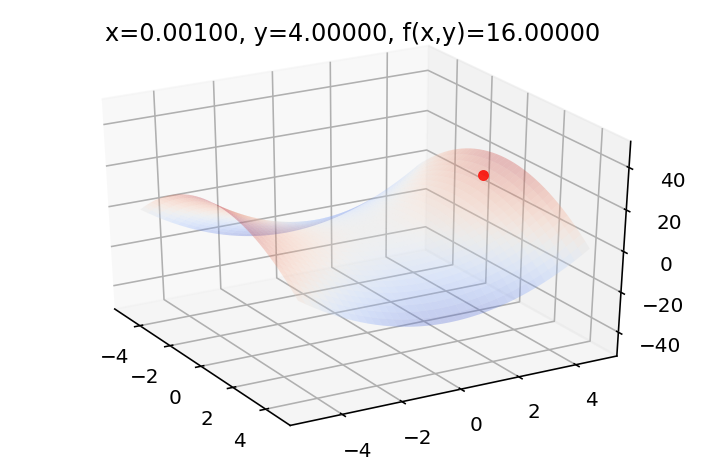

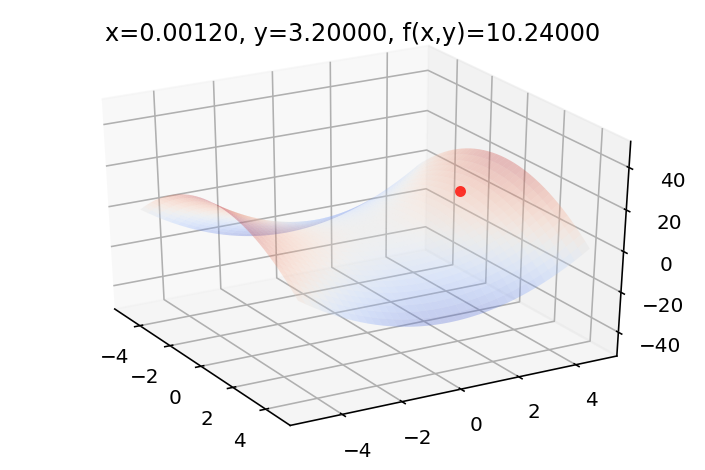

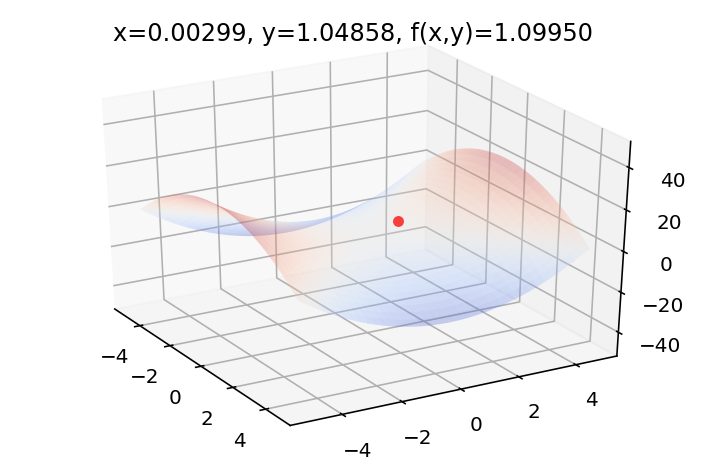

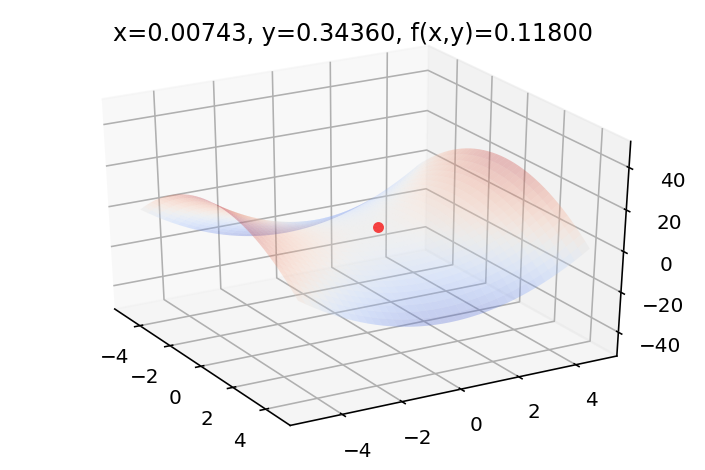

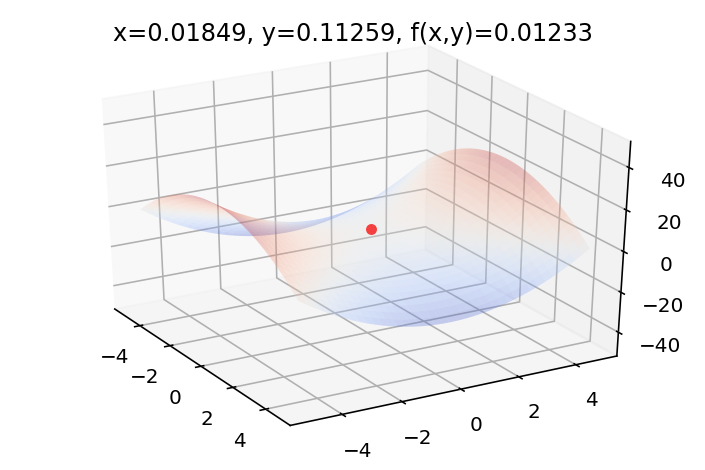

In [5]:
run_grad()

The visualization gives us a clearer picture that after assigning an inital value of our parameters ($x$ and $y$) and parameters such as number of iterations and learning_rate, the gradient descent algorithm will start adjusting the parameters's value to optimize our cost function.


## Adagrad

The vanilla gradient descent gets the job done, but it does have some drawbacks:

- Learning rate is fixed across all iterations. i.e. We want the optimizer to perform larger updates in the beginning and smaller updates at the end so it doesn't overshoot the optimal value.
- Learning rate is fixed for all parameters. i.e. we would also like to adapt our updates to each individual parameter to perform larger or smaller updates depending on their importance.

The **Adagrad** optimizer tries to address this problem by taking the gradients of the past iteration into account.

\begin{align}
& G_t = \sum_{n=0}^{t} g_n^2 \\
& \theta_{t+1} := \theta_t - \frac{\alpha}{\sqrt{G_t + \epsilon}} g_t \\
\end{align}

Where $G_t$ is the sum of the squares of the gradients up to iteration $t$ and while $\epsilon$ is a smoothing term that avoids division by zero (usually on the order of 1e−8). Due to the fact that Adagrad's learning rate diminishes as the number of iterations grows, we can assign it a larger initial value.

In [6]:
def run_adagrad(n_iters = 20, learning_rate = 0.5):
    """Adaptive gradient descent (Adagrad)"""
    xt = 0.001
    yt = 4
    Gxt = 0
    Gyt = 0
    epsilon = 1e-8
    plot_func(xt, yt, 'b')
    for i in range(n_iters):
        gxt, gyt = func_gradient(xt, yt)
        Gxt += gxt ** 2
        Gyt += gyt ** 2
        xt -= learning_rate * (1. / (Gxt ** 0.5 + epsilon)) * gxt
        yt -= learning_rate * (1. / (Gyt ** 0.5 + epsilon)) * gyt

        # plot the current x, y coordinate and
        # the corresponding objective function's value
        # at every 5th iteration
        if i % 5 == 0:
            plot_func(xt, yt, 'b')

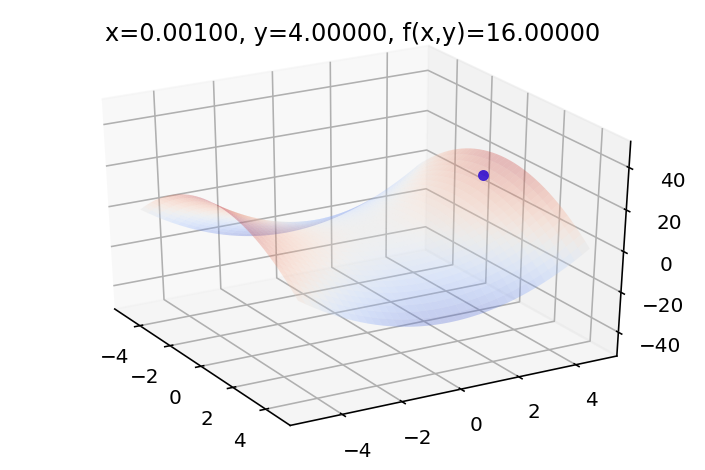

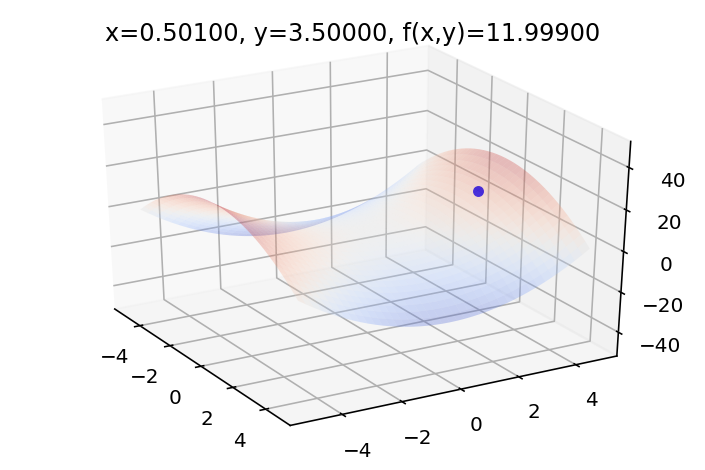

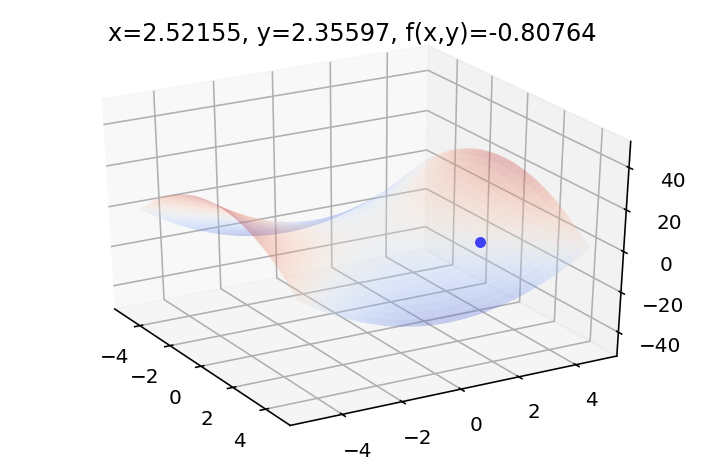

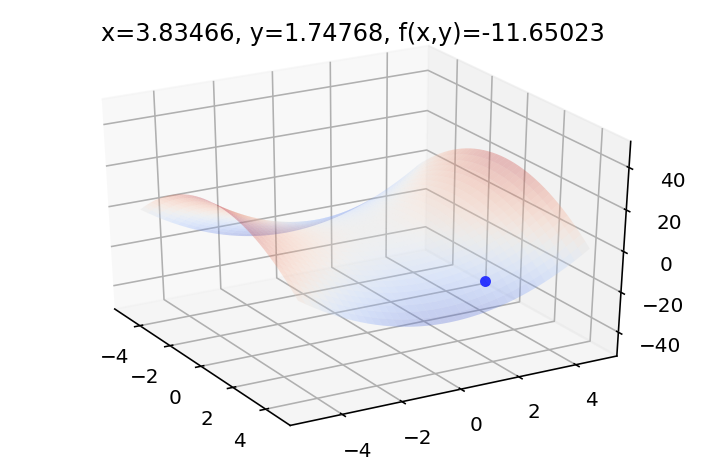

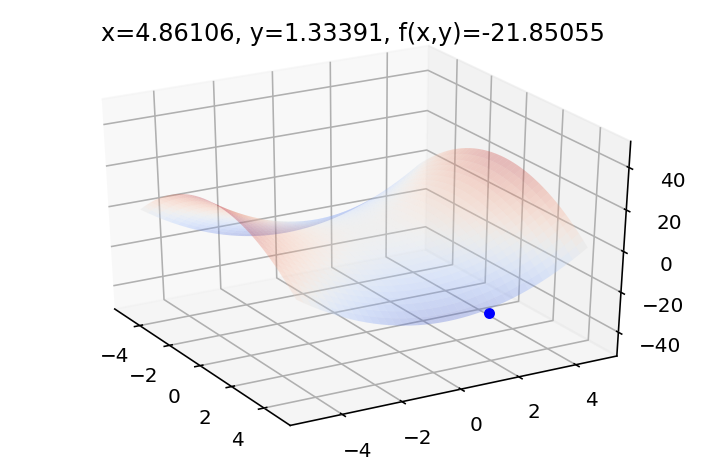

In [7]:
run_adagrad()

The following link contains a far more detailed dicussion of various gradient descent algorithms. [Blog: An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)

# Reference

- [Notes: Stanford cs229: Supervised learning](http://cs229.stanford.edu/notes/cs229-notes1.pdf)
- [Blog: An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)
- [Blog: Gradient Descent & AdaGrad](https://ckmarkoh.github.io/blog/2015/12/23/optimization-method-adagrad/) (Chinese Mandarin)